In [34]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
df = pd.read_excel('Data Makro Coba Regresi.xlsx')
df

,No,Inflasi,Kurs Dollar,Tingkat Pengangguran Terbuka,Penduduk Bekerja,PDB,BI-7Day-RR,Kurs Jual,Kurs Beli,Kurs_Tengh,...,Ketersediaanlapangan kerja,Indeks Ekspektasi Kegiatan Usaha,Bucket1,Bucket2,Bucket3,Bucket4,Bucket5,Bucket6,Bucket7,ENR_SA
0,2,6.29,12863,5.81,94.19,2728180.7,NaN,12927.00,12799.00,12863.000,...,93.500000,127.700000,0.091049,0.090332,0.645989,2.127202,0.762545,0.364279,0.700995,3.916049e+06
1,3,6.38,13084,5.81,94.19,2728180.7,NaN,13149.00,13019.00,13084.000,...,94.200000,126.300000,0.111084,0.125652,0.330993,1.357395,1.071865,0.539643,0.815069,3.928442e+06
2,4,6.79,12937,5.81,94.19,2867948.4,NaN,13002.00,12872.00,12937.000,...,86.900000,114.100000,0.127906,0.062510,0.360759,1.041908,0.883360,1.113973,0.868535,3.927886e+06
3,5,7.15,13332,5.81,94.19,2867948.4,NaN,13277.00,13145.00,13211.000,...,85.700000,123.800000,0.109887,0.067848,0.497617,1.740524,2.200627,0.919161,0.248662,3.987756e+06
4,6,7.26,13481,5.81,94.19,2867948.4,NaN,13399.00,13265.00,13332.000,...,83.700000,122.200000,0.134203,0.082354,0.254064,3.272908,0.758081,1.153567,0.284666,4.283802e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,92,4.69,14853,5.86,94.14,5091171.0,3.75,14949.38,14800.63,14875.005,...,112.494544,144.144259,0.049760,0.157801,0.162716,0.434568,0.692453,0.762326,0.983289,6.017576e+06
91,93,5.95,15232,5.86,94.14,5091171.0,4.25,15323.24,15170.76,15247.000,...,113.579981,119.113809,0.050906,0.103523,0.183221,0.378696,0.786703,0.870500,0.641438,6.038004e+06
92,94,5.71,15596,5.86,94.14,5091171.0,4.75,15619.71,15464.29,15542.000,...,112.919812,126.698386,0.045186,0.180939,0.382687,0.449638,0.712818,0.964153,0.861091,6.051226e+06
93,95,5.42,15742,5.86,94.14,5091171.0,5.25,15815.68,15658.32,15737.000,...,113.852004,120.270473,0.049941,0.077355,0.200882,0.413168,0.602800,0.800413,0.821972,6.015487e+06


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   No                                              95 non-null     int64  
 1   Inflasi                                         95 non-null     float64
 2   Kurs Dollar                                     95 non-null     int64  
 3   Tingkat Pengangguran Terbuka                    95 non-null     float64
 4   Penduduk Bekerja                                95 non-null     float64
 5   PDB                                             95 non-null     float64
 6   BI-7Day-RR                                      81 non-null     float64
 7   Kurs Jual                                       95 non-null     float64
 8   Kurs Beli                                       95 non-null     float64
 9   Kurs_Tengh                                   

In [37]:
# Fill missing value with mean

df['BI-7Day-RR'] = df['BI-7Day-RR'].fillna(df['BI-7Day-RR'].mean())

In [38]:
df.isna()

,No,Inflasi,Kurs Dollar,Tingkat Pengangguran Terbuka,Penduduk Bekerja,PDB,BI-7Day-RR,Kurs Jual,Kurs Beli,Kurs_Tengh,...,Ketersediaanlapangan kerja,Indeks Ekspektasi Kegiatan Usaha,Bucket1,Bucket2,Bucket3,Bucket4,Bucket5,Bucket6,Bucket7,ENR_SA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
df = df.drop(['No'], axis=1)
df

,Inflasi,Kurs Dollar,Tingkat Pengangguran Terbuka,Penduduk Bekerja,PDB,BI-7Day-RR,Kurs Jual,Kurs Beli,Kurs_Tengh,Indeks Keyakinan Konsumen (IKK),...,Ketersediaanlapangan kerja,Indeks Ekspektasi Kegiatan Usaha,Bucket1,Bucket2,Bucket3,Bucket4,Bucket5,Bucket6,Bucket7,ENR_SA
0,6.29,12863,5.81,94.19,2728180.7,4.57716,12927.00,12799.00,12863.000,120.233247,...,93.500000,127.700000,0.091049,0.090332,0.645989,2.127202,0.762545,0.364279,0.700995,3.916049e+06
1,6.38,13084,5.81,94.19,2728180.7,4.57716,13149.00,13019.00,13084.000,116.859733,...,94.200000,126.300000,0.111084,0.125652,0.330993,1.357395,1.071865,0.539643,0.815069,3.928442e+06
2,6.79,12937,5.81,94.19,2867948.4,4.57716,13002.00,12872.00,12937.000,107.438264,...,86.900000,114.100000,0.127906,0.062510,0.360759,1.041908,0.883360,1.113973,0.868535,3.927886e+06
3,7.15,13332,5.81,94.19,2867948.4,4.57716,13277.00,13145.00,13211.000,112.787684,...,85.700000,123.800000,0.109887,0.067848,0.497617,1.740524,2.200627,0.919161,0.248662,3.987756e+06
4,7.26,13481,5.81,94.19,2867948.4,4.57716,13399.00,13265.00,13332.000,111.337590,...,83.700000,122.200000,0.134203,0.082354,0.254064,3.272908,0.758081,1.153567,0.284666,4.283802e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,4.69,14853,5.86,94.14,5091171.0,3.75000,14949.38,14800.63,14875.005,124.717179,...,112.494544,144.144259,0.049760,0.157801,0.162716,0.434568,0.692453,0.762326,0.983289,6.017576e+06
91,5.95,15232,5.86,94.14,5091171.0,4.25000,15323.24,15170.76,15247.000,117.201816,...,113.579981,119.113809,0.050906,0.103523,0.183221,0.378696,0.786703,0.870500,0.641438,6.038004e+06
92,5.71,15596,5.86,94.14,5091171.0,4.75000,15619.71,15464.29,15542.000,120.295820,...,112.919812,126.698386,0.045186,0.180939,0.382687,0.449638,0.712818,0.964153,0.861091,6.051226e+06
93,5.42,15742,5.86,94.14,5091171.0,5.25000,15815.68,15658.32,15737.000,119.063620,...,113.852004,120.270473,0.049941,0.077355,0.200882,0.413168,0.602800,0.800413,0.821972,6.015487e+06


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Inflasi                                         95 non-null     float64
 1   Kurs Dollar                                     95 non-null     int64  
 2   Tingkat Pengangguran Terbuka                    95 non-null     float64
 3   Penduduk Bekerja                                95 non-null     float64
 4   PDB                                             95 non-null     float64
 5   BI-7Day-RR                                      95 non-null     float64
 6   Kurs Jual                                       95 non-null     float64
 7   Kurs Beli                                       95 non-null     float64
 8   Kurs_Tengh                                      95 non-null     float64
 9   Indeks Keyakinan Konsumen (IKK)              

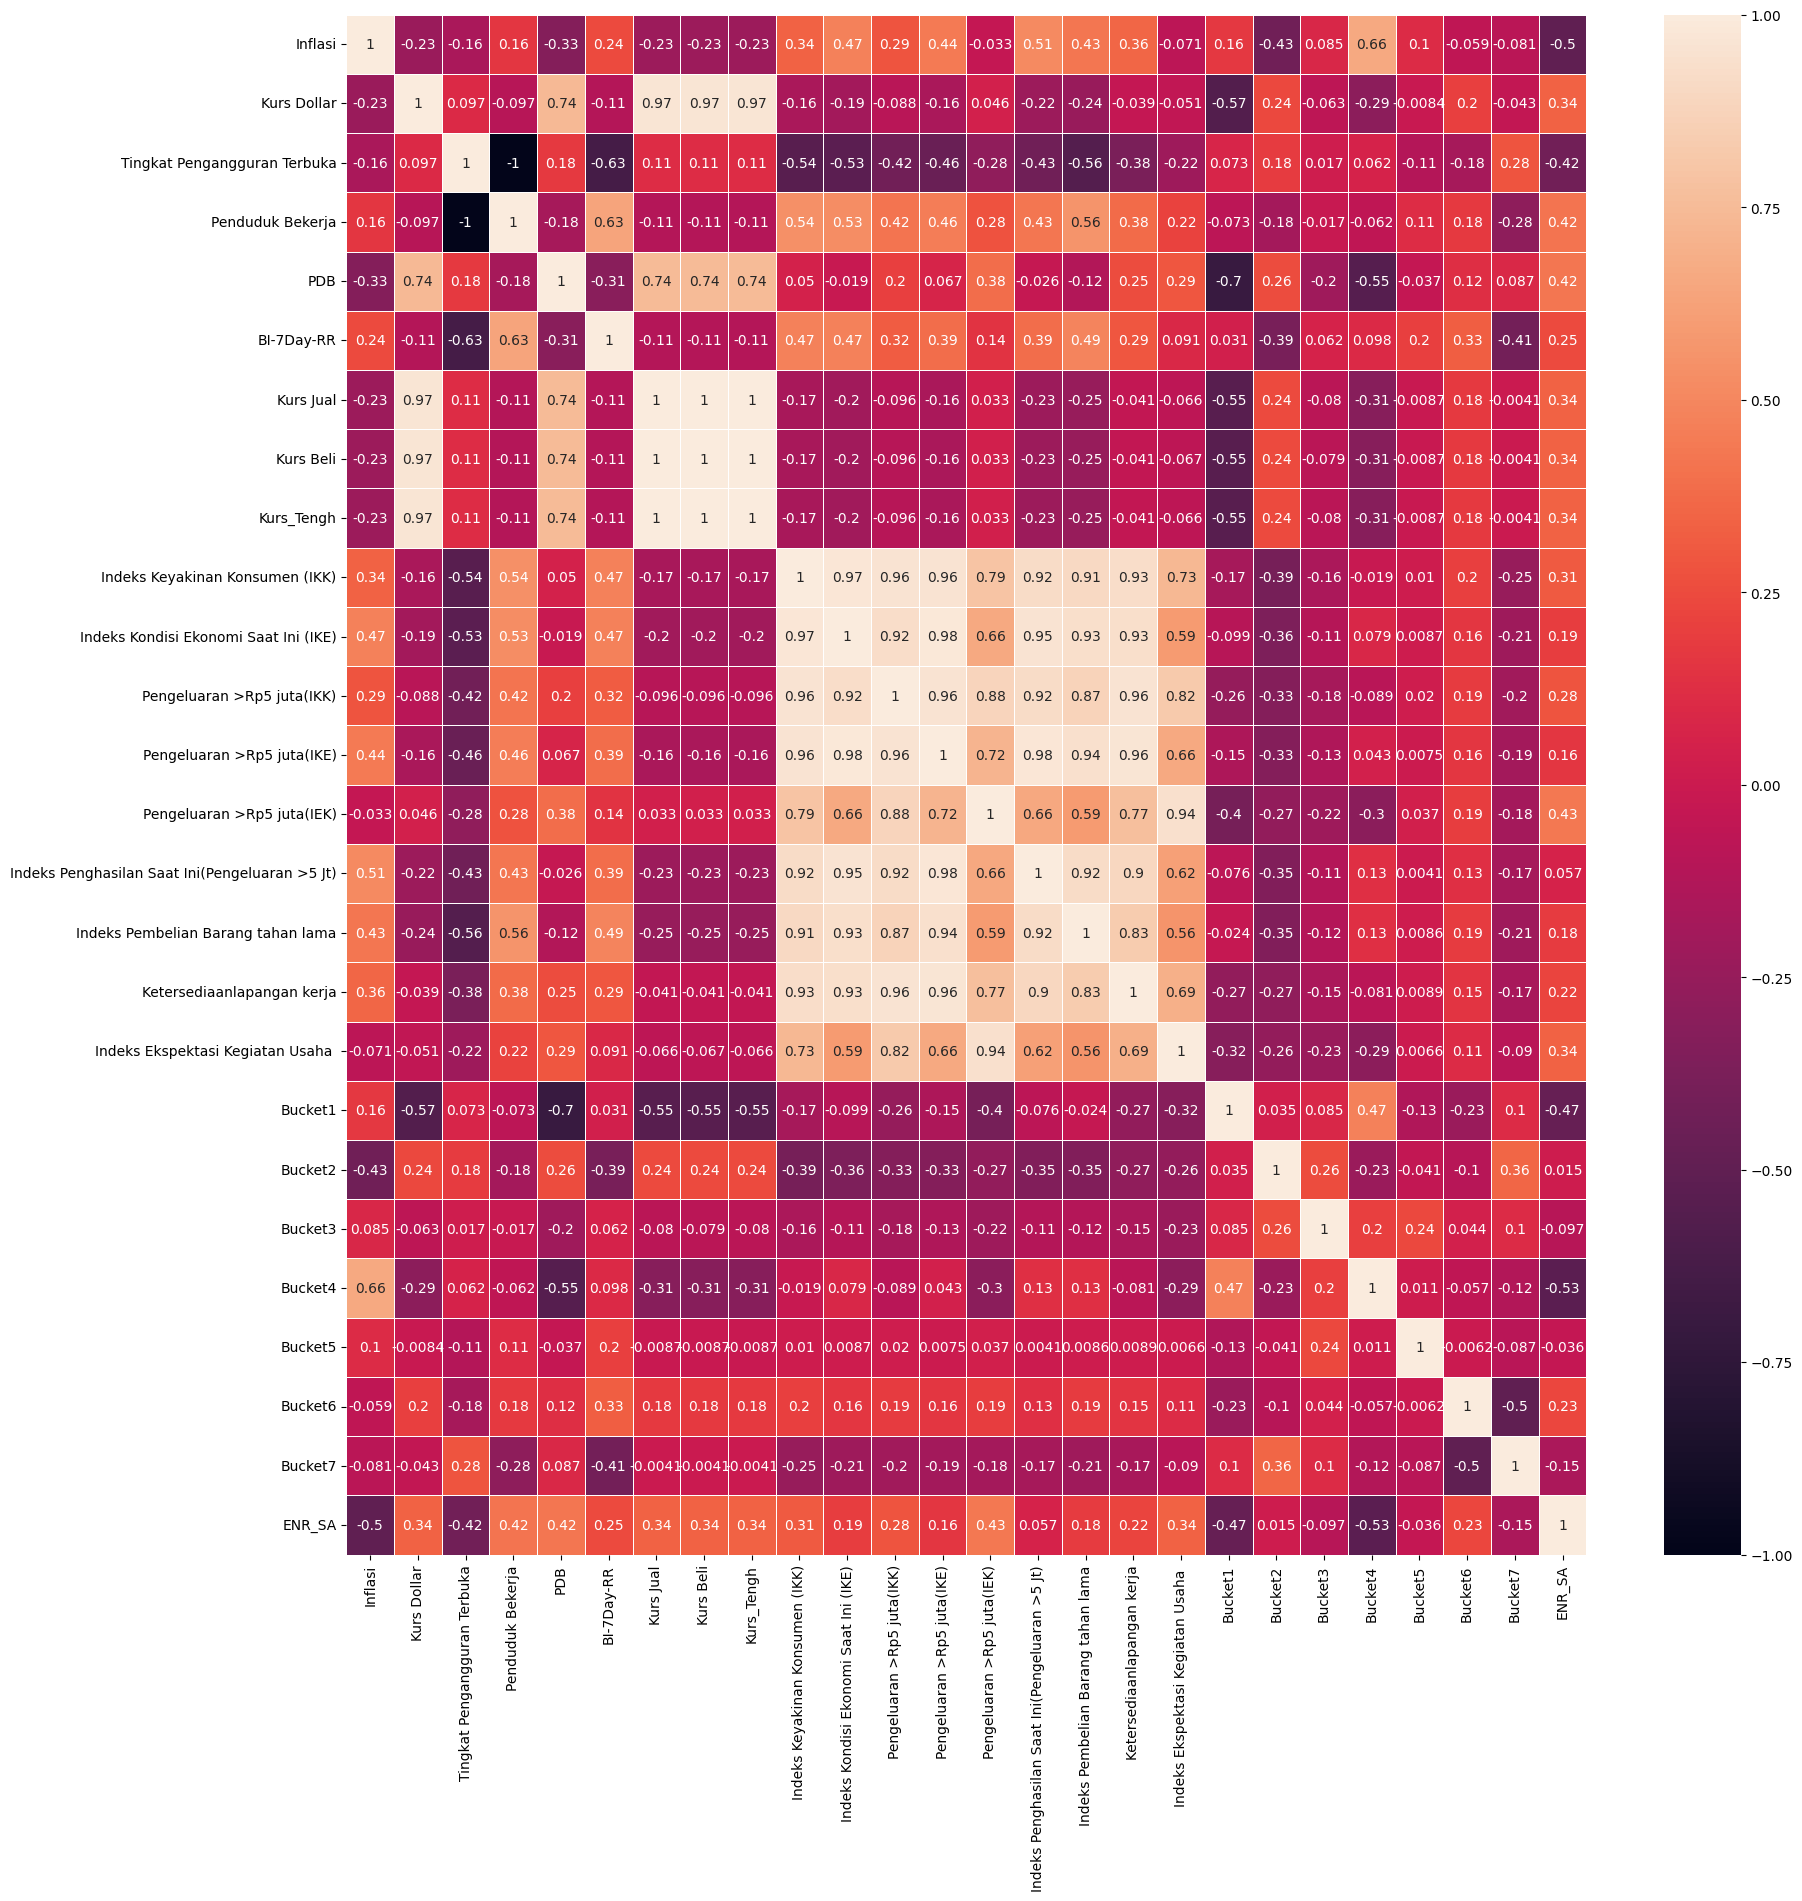

In [41]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.5);

In [42]:
high_corr = []
# df_corr = df.corr()
# target_corr = df_corr.columns.get_loc('ENR_SA')
threshold = 0.7
# target_corr
# df_corr

for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr_value = df.iloc[:, i].corr(df.iloc[:, j])
        if abs(corr_value) > threshold:
            high_corr.append((df.columns[i], df.columns[j], corr_value))

print("High Correlation Features (in-pair): ")

for pair in high_corr:
    print(pair[0], "and", pair[1], "with correlation", pair[2])

# multi.to_list()
# print(multi)

High Correlation Features (in-pair): 
Kurs Dollar and PDB with correlation 0.7410896070781374
Kurs Dollar and Kurs Jual with correlation 0.9677835513815793
Kurs Dollar and Kurs Beli with correlation 0.9677917958318148
Kurs Dollar and Kurs_Tengh with correlation 0.9677877031086228
Tingkat Pengangguran Terbuka and Penduduk Bekerja with correlation -1.0
PDB and Kurs Jual with correlation 0.743705188169485
PDB and Kurs Beli with correlation 0.7436513114912553
PDB and Kurs_Tengh with correlation 0.7436784223694375
PDB and Bucket1 with correlation -0.7022232558376147
Kurs Jual and Kurs Beli with correlation 0.9999997932448461
Kurs Jual and Kurs_Tengh with correlation 0.9999999488245472
Kurs Beli and Kurs_Tengh with correlation 0.9999999477953117
Indeks Keyakinan Konsumen (IKK) and Indeks Kondisi Ekonomi Saat Ini (IKE) with correlation 0.9717855014822857
Indeks Keyakinan Konsumen (IKK) and Pengeluaran >Rp5 juta(IKK) with correlation 0.9609367422096253
Indeks Keyakinan Konsumen (IKK) and Penge

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Inflasi                                         95 non-null     float64
 1   Kurs Dollar                                     95 non-null     int64  
 2   Tingkat Pengangguran Terbuka                    95 non-null     float64
 3   Penduduk Bekerja                                95 non-null     float64
 4   PDB                                             95 non-null     float64
 5   BI-7Day-RR                                      95 non-null     float64
 6   Kurs Jual                                       95 non-null     float64
 7   Kurs Beli                                       95 non-null     float64
 8   Kurs_Tengh                                      95 non-null     float64
 9   Indeks Keyakinan Konsumen (IKK)              

In [44]:
# Drop features that have multicollinearity

df = df.drop(['Kurs Dollar', 'Kurs Jual', 'Kurs Beli', 'Kurs_Tengh', 'PDB', 'Indeks Kondisi Ekonomi Saat Ini (IKE)', 'Pengeluaran >Rp5 juta(IKK)', 'Pengeluaran >Rp5 juta(IKE)', 'Indeks Keyakinan Konsumen (IKK)', 'Ketersediaanlapangan kerja', 'Indeks Penghasilan Saat Ini(Pengeluaran >5 Jt)', 'Indeks Pembelian Barang tahan lama'], axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Inflasi                            95 non-null     float64
 1   Tingkat Pengangguran Terbuka       95 non-null     float64
 2   Penduduk Bekerja                   95 non-null     float64
 3   BI-7Day-RR                         95 non-null     float64
 4   Pengeluaran >Rp5 juta(IEK)         95 non-null     float64
 5   Indeks Ekspektasi Kegiatan Usaha   95 non-null     float64
 6   Bucket1                            95 non-null     float64
 7   Bucket2                            95 non-null     float64
 8   Bucket3                            95 non-null     float64
 9   Bucket4                            95 non-null     float64
 10  Bucket5                            95 non-null     float64
 11  Bucket6                            95 non-null     float64
 

In [46]:
# SPLITTING DATA

features = df.columns[0:12]
target = df.columns[-1]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [47]:
# Pre-Processing using Standard Scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LINEAR REGRESSION

In [48]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
y_pred

array([6901918.26394582, 7245982.26394582, 6492318.26394582,
       7016606.26394582, 6803614.26394582, 5997726.26394582,
       5341342.26394582, 6713502.26394582, 5769374.26394582,
       5980318.26394582, 6557854.26394582, 6447262.26394582,
       5910686.26394582, 6349982.26394582, 6096030.26394582,
       6242462.26394582, 5470366.26394582, 6282398.26394582,
       5748894.26394582, 5765278.26394582, 6899870.26394582,
       5083294.26394582, 6684830.26394582, 6246558.26394582,
       5738654.26394582, 6279326.26394582, 3727518.26394582,
       5189790.26394582, 6209694.26394582])

In [49]:
# RMSE

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE of Linear Regression: {}".format(rmse))

# R2 Score
r2 = r2_score(y_test, y_pred)
print("R2 Score of Linear Regression: {}".format(r2))

RMSE of Linear Regression: 584891.6124480357
R2 Score of Linear Regression: 0.6187460942423508


RIDGE REGRESSION

In [50]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
y_pred_ridge

array([6408685.90883652, 6518046.67106891, 6870775.28240358,
       6582866.9437245 , 7031373.68754297, 5893779.2026173 ,
       5691536.41302521, 6790196.71350568, 5488824.06627272,
       6367237.68058001, 6441923.3835593 , 6502855.47771983,
       5800418.05695126, 6398470.70473915, 6118394.99677654,
       5823417.63442533, 5730581.77678122, 6152181.78650365,
       6136151.70033742, 6011131.7777999 , 6432058.42381892,
       5456124.20364483, 6888227.65749292, 5685199.2375504 ,
       5669293.97531853, 6264393.65152392, 3703441.44468231,
       5613928.00585258, 6082544.48494894])

In [51]:
# RMSE

rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("RMSE of Ridge Regression: {}".format(rmse))

# R2 Score
r2 = r2_score(y_test, y_pred_ridge)
print("R2 Score of Ridge Regression: {}".format(r2))

RMSE of Ridge Regression: 715537.0132006392
R2 Score of Ridge Regression: 0.42940531471676147


LASSO REGRESSION

In [52]:
lasso_model = Lasso(alpha=10, max_iter=1000)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
y_pred_lasso

array([6418143.5404984 , 6875931.24136613, 6757684.07788307,
       7066762.25672152, 7188052.73054591, 5899877.31998741,
       5877910.93314137, 6544214.5310838 , 5605240.06876681,
       5887765.52054248, 6593295.69930109, 6535362.89347096,
       5792519.63973534, 6303165.17075519, 6053310.59417664,
       6081972.98767813, 5450639.44402134, 6285352.72600919,
       5821862.14407734, 5668714.57530229, 6938910.23434447,
       5029758.15987156, 7003006.44257617, 6037115.05602661,
       5461118.99689128, 6070367.53033972, 3899926.65963569,
       5728348.73835423, 6032349.04865567])

In [53]:
# RMSE

rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
print("RMSE of Lasso Regression: {}".format(rmse))

# R2 Score
r2 = r2_score(y_test, y_pred_lasso)
print("R2 Score of Lasso Regression: {}".format(r2))

RMSE of Lasso Regression: 667034.4045168483
R2 Score of Lasso Regression: 0.5041389634515885
